<a href="https://colab.research.google.com/github/ABBU2712/AIcrowd-Mission-Control/blob/main/Rotation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ROTATION PREDICTION

##Installing Packages

In [1]:
!pip install --upgrade fastai
!pip install aicrowd-cli==0.1

     |████████████████████████████████| 194kB 4.0MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 321kB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 204kB 6.0MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 163kB 6.8MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 71kB 4.0M

In [2]:
API_KEY = '08882bea69d263e6f7532dca7d30840c' 
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [3]:
!aicrowd dataset download --challenge mars-rotation

sample_submission.csv: 100% 95.9k/95.9k [00:00<00:00, 647kB/s]
test.zip: 100% 76.5M/76.5M [00:02<00:00, 30.0MB/s]
train.csv: 100% 377k/377k [00:00<00:00, 1.12MB/s]
train.zip: 100% 306M/306M [00:31<00:00, 9.60MB/s]
val.csv: 100% 33.7k/33.7k [00:00<00:00, 479kB/s]
val.zip: 100% 30.6M/30.6M [00:01<00:00, 23.9MB/s]


In [4]:
!rm -rf data
!mkdir data

!unzip -q train.zip  -d data/train
!unzip -q val.zip -d data/val
!unzip -q test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

In [5]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

**Training The Data**

In [6]:
data_folder = "data"

In [7]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))

In [8]:
train_df

,ImageID,label
0,0,141
1,1,53
2,2,45
3,3,48
4,4,14
...,...,...
39995,39995,268
39996,39996,193
39997,39997,195
39998,39998,199


In [9]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

,ImageID,label
0,0.jpg,141
1,1.jpg,53
2,2.jpg,45
3,3.jpg,48
4,4.jpg,14
...,...,...
39995,39995.jpg,268
39996,39996.jpg,193
39997,39997.jpg,195
39998,39998.jpg,199


##Visualization

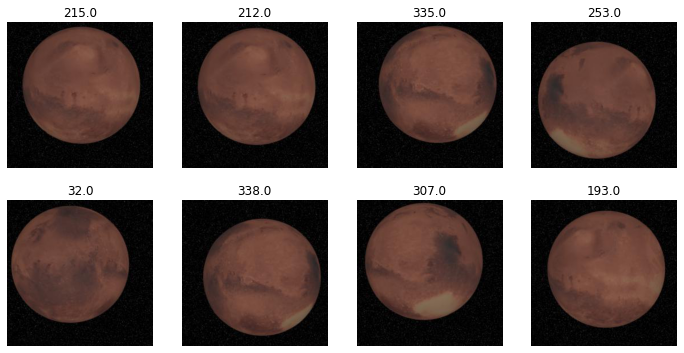

In [10]:
dls = ImageDataLoaders.from_df(train_df, path=os.path.join(data_folder, "train"), bs=8, y_block=RegressionBlock)
dls.show_batch()

In [11]:
learn = cnn_learner(dls, alexnet, metrics=mse)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,mse,time
0,2470.661621,69524.281250,69524.281250,26:51


epoch,train_loss,valid_loss,mse,time


epoch,train_loss,valid_loss,mse,time
0,1939.848633,9649.334961,9649.334961,1:04:34


TESTING THE DATA

In [13]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))
test_dls = dls.test_dl(test_imgs_name)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

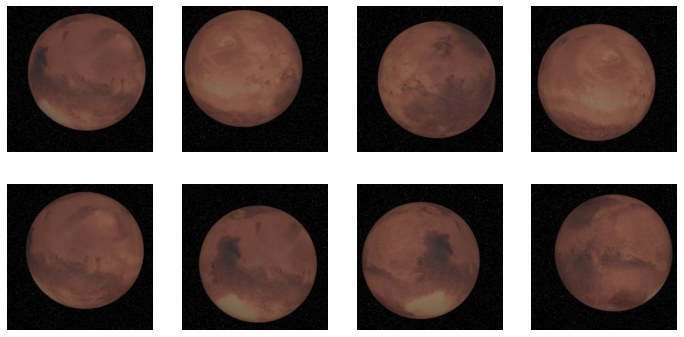

In [14]:
test_dls.show_batch()

In [15]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [i[0] for i in results.numpy()]

In [16]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

,ImageID,label
0,3917,193.993011
1,1348,186.014618
2,2426,180.837631
3,8808,190.205154
4,3417,197.593903
...,...,...
9995,193,193.731125
9996,2090,205.209213
9997,5313,187.735291
9998,5589,193.575668


In [17]:
submission.to_csv("submission.csv", index=False)

In [18]:
!aicrowd submission create -c mars-rotation -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━ 100.0% • 235.5/233.9 KB • 720.8 kB/s • 0:00:00
                                    ╭─────────────────────────╮                                     
                                    │ Successfully submitted! │                                     
                                    ╰─────────────────────────╯                                     
                                          Important links                                           
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/submissions/126871              │
│                  │                                                                               │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-7/submissions?my_submissions=true │
│                  │                                                                               │
│      Lea